Project name:  Handwritten digits classifier from the scrach by using Neural Networks and Pytorch

Author: Mrinmayee Dhumne

Programming language: Python

Dataset: MNIST Databasse 

In [1]:
# Import neccessary libraries and pakeges 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as px
from time import time
import torch
import torchvision
from torchvision import datasets, transforms


# Import necessary packages
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


#Modifictions on the data before feeding it into the pipeline using torchvision.transforms.
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

In [2]:
#Let's download the dataset
#use DataLoader in pytorch
#Train dataset
train = datasets.MNIST('TRAINSET', download=True, train=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train, batch_size=64, shuffle=True)

#validation dataset
val = datasets.MNIST('TESTSET', download=True, train=False, transform=transform)
val_loader = torch.utils.data.DataLoader(val, batch_size=64, shuffle=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting TRAINSET/MNIST/raw/train-images-idx3-ubyte.gz to TRAINSET/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting TRAINSET/MNIST/raw/train-labels-idx1-ubyte.gz to TRAINSET/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting TRAINSET/MNIST/raw/t10k-images-idx3-ubyte.gz to TRAINSET/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting TRAINSET/MNIST/raw/t10k-labels-idx1-ubyte.gz to TRAINSET/MNIST/raw



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting TESTSET/MNIST/raw/train-images-idx3-ubyte.gz to TESTSET/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting TESTSET/MNIST/raw/train-labels-idx1-ubyte.gz to TESTSET/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting TESTSET/MNIST/raw/t10k-images-idx3-ubyte.gz to TESTSET/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting TESTSET/MNIST/raw/t10k-labels-idx1-ubyte.gz to TESTSET/MNIST/raw



Exploratory Data Analysis 

In [3]:
# pytorch dataLoaders are iterable
#images and tensors
data_iter = iter(train_loader)
images, labels = data_iter.next()

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


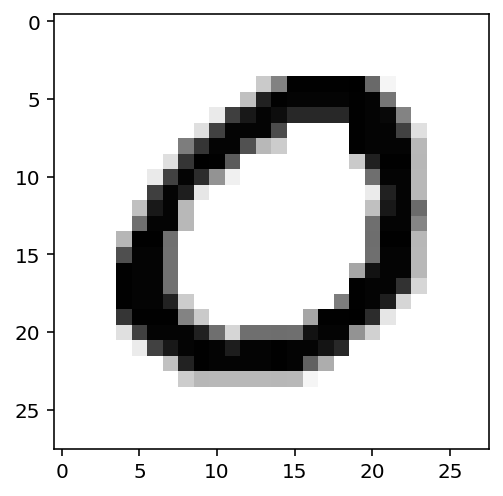

In [4]:
## Reshaping the dataset, so that we can display the individual images
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

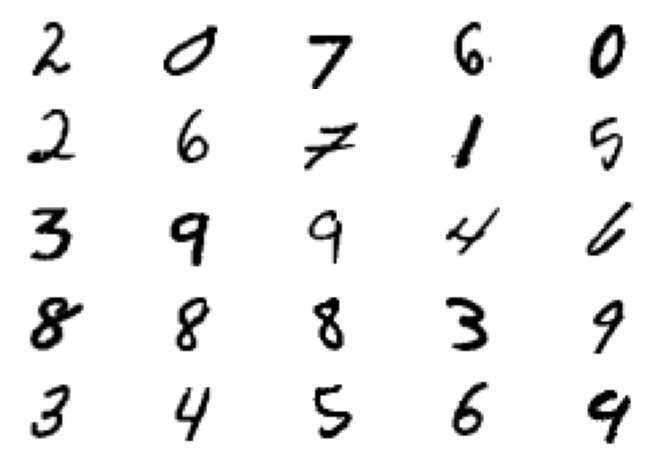

In [5]:
#how the dataset looks like.
fig = plt.figure()
num_images = 25
for index in range(1, num_images + 1):
    plt.subplot(5, 5, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [13]:
images  = images / 255.0
val_images = images / 255.0

In [14]:
#Build the Neural Network
#contains an input layer (the first layer), 
#an output layer of ten neurons (or units, the circles) 
#and two hidden layers in between.

from torch import nn, optim
input_size = 784
hidden_sizes = [128, 128]
output_size = 10

#Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [15]:
# used Negative log-likelihood loss function for multi-class classification
criterion = nn.NLLLoss()
images, labels = next(iter(train_loader))
images = images.view(images.shape[0], -1)

logprob = model(images) #log probabilities
loss = criterion(logprob, labels) #calculate the NuLL loss

In [16]:
#adjustment of weights of the network to minimize the loss


print('Before backward pass: \n', model[0].weight.grad)
loss.backward()
print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[-0.0022, -0.0022, -0.0022,  ..., -0.0022, -0.0022, -0.0022],
        [-0.0024, -0.0024, -0.0024,  ..., -0.0024, -0.0024, -0.0024],
        [-0.0029, -0.0029, -0.0029,  ..., -0.0029, -0.0029, -0.0029],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0014, -0.0014, -0.0014,  ..., -0.0014, -0.0014, -0.0014],
        [ 0.0021,  0.0021,  0.0021,  ...,  0.0021,  0.0021,  0.0021]])


In [17]:
# Optimizers for adjusting model parameters to reduce model error in training step
# I used  stochastic gradient descent SGD from pytorch
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

In [18]:
print('Initial weights - ', model[0].weight)
images, labels = next(iter(train_loader))
images.resize_(64, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward then backward pass & update the  weights
output = model(images)
loss = criterion(output, labels)
loss.backward()
print('After Gradient -', model[0].weight.grad)


Initial weights -  Parameter containing:
tensor([[ 0.0163,  0.0310, -0.0202,  ..., -0.0168, -0.0172, -0.0193],
        [ 0.0195,  0.0153,  0.0267,  ..., -0.0173, -0.0349,  0.0228],
        [-0.0029, -0.0306, -0.0004,  ...,  0.0094, -0.0255,  0.0289],
        ...,
        [-0.0209,  0.0067,  0.0243,  ...,  0.0044, -0.0039,  0.0148],
        [ 0.0306,  0.0205,  0.0293,  ..., -0.0115, -0.0337, -0.0002],
        [-0.0329, -0.0002,  0.0121,  ..., -0.0026, -0.0134,  0.0296]],
       requires_grad=True)
After Gradient - tensor([[ 0.0005,  0.0005,  0.0005,  ...,  0.0005,  0.0005,  0.0005],
        [-0.0003, -0.0003, -0.0003,  ..., -0.0003, -0.0003, -0.0003],
        [-0.0009, -0.0009, -0.0009,  ..., -0.0009, -0.0009, -0.0009],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0012,  0.0012,  0.0012,  ...,  0.0012,  0.0012,  0.0012],
        [-0.0002, -0.0002, -0.0002,  ..., -0.0002, -0.0002, -0.0002]])


In [19]:
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[ 0.0163,  0.0310, -0.0203,  ..., -0.0168, -0.0173, -0.0193],
        [ 0.0195,  0.0153,  0.0267,  ..., -0.0173, -0.0349,  0.0228],
        [-0.0029, -0.0305, -0.0004,  ...,  0.0094, -0.0255,  0.0289],
        ...,
        [-0.0209,  0.0067,  0.0243,  ...,  0.0044, -0.0039,  0.0148],
        [ 0.0305,  0.0205,  0.0293,  ..., -0.0115, -0.0337, -0.0002],
        [-0.0329, -0.0002,  0.0121,  ..., -0.0026, -0.0134,  0.0296]],
       requires_grad=True)


Core Training Of the Neural Network


In [20]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in train_loader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(train_loader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.6270658464780622
Epoch 1 - Training loss: 0.28270036154496136
Epoch 2 - Training loss: 0.21571474167099322
Epoch 3 - Training loss: 0.17485838789723193
Epoch 4 - Training loss: 0.14590118228515456
Epoch 5 - Training loss: 0.12505124739087276
Epoch 6 - Training loss: 0.11039378099453284
Epoch 7 - Training loss: 0.09770813644297723
Epoch 8 - Training loss: 0.08706007015083168
Epoch 9 - Training loss: 0.08063321073166231
Epoch 10 - Training loss: 0.07280759106495424
Epoch 11 - Training loss: 0.066828119578952
Epoch 12 - Training loss: 0.061940551009168156
Epoch 13 - Training loss: 0.0567639286710279
Epoch 14 - Training loss: 0.05251933227497727

Training Time (in minutes) = 3.3404889265696207


Prediction = 4


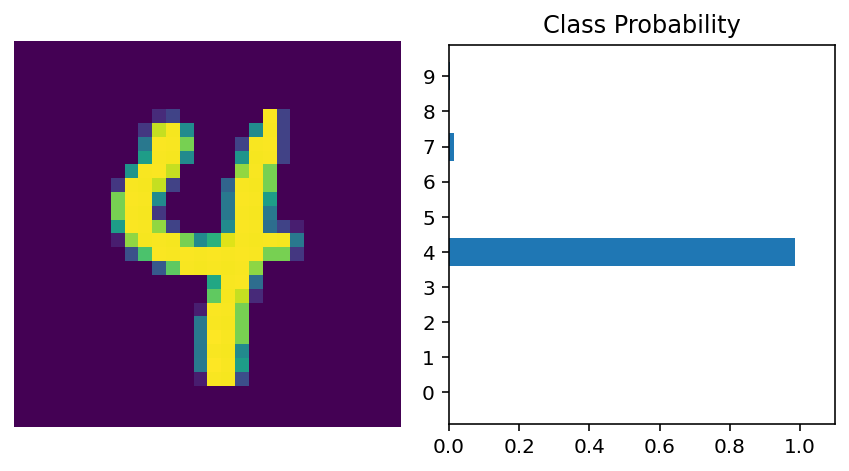

In [13]:
#Testing

#lets build a function for viewing an image and it's most probable class.
    
def prediction(img, ps):
    
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

images, labels = next(iter(val_loader))

img = images[0].view(1, 784)
with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Prediction =", probab.index(max(probab)))
prediction(img.view(1, 28, 28), ps)

Model Evaluation

In [14]:
correct_count, count_all = 0, 0
for images,labels in val_loader:
  for i in range(len(labels)):
    image = images[i].view(1, 784)
    # Turn off gradients to speed for a while
    with torch.no_grad():
        logps = model(image)

    # Output of the network are log-probabilities, need to take exponential for probabilities
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    count_all += 1

print("Number Of Images Tested =", count_all)
print("\nModel Accuracy =", (correct_count/count_all))

Number Of Images Tested = 10000

Model Accuracy = 0.9722


In [15]:

!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.1 MB 29.4 MB/s 
     |████████████████████████████████| 2.0 MB 50.7 MB/s 
     |████████████████████████████████| 53 kB 1.9 MB/s 
     |████████████████████████████████| 256 kB 43.9 MB/s 
     |████████████████████████████████| 212 kB 51.3 MB/s 
     |████████████████████████████████| 84 kB 4.2 MB/s 
     |████████████████████████████████| 1.1 MB 52.8 MB/s 
     |████████████████████████████████| 54 kB 3.2 MB/s 
     |████████████████████████████████| 94 kB 3.9 MB/s 
     |████████████████████████████████| 271 kB 52.7 MB/s 
     |████████████████████████████████| 144 kB 55.9 MB/s 
     |████████████████████████████████| 11.1 MB 45.8 MB/s 
     |████████████████████████████████| 63 kB 2.2 MB/s 
     |████████████████████████████████| 80 kB 10.8 MB/s 
     |████████████████████████████████| 43 kB 2.1 MB/s 
     |████████████████████████████████| 4.0

In [16]:
import gradio as gr

In [35]:
def predict_image(img):
  image=img.reshape(1,28,28)
  #im_resize=image/255.0
  prediction=model.predict(im_resize)
  pred=np.argmax(prediction)
  return pred

In [32]:
iface = gr.Interface(predict_image, inputs="sketchpad", outputs="label")

In [33]:
iface.launch(debug='True')

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://24761.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.


(<gradio.routes.App at 0x7f3988132250>,
 'http://127.0.0.1:7860/',
 'https://24761.gradio.app')